# Réglages de l'Asservissement du Robot

Ce bloc-note a pour objectif de garder une trace écrite de nos tests de réglage de l'asservissement du robot.

## Réglage de l'Odométrie

TODO

## Analyse des Courbes de Réponse du Robot

Dans cette partie, on suppose que le réglage de l'odométrie du robot a déjà été effectué.
On a donc accès aux positions et angles du robot à tout instant.

On suppose également que les moteurs sont commandables, i.e. que l'on peut envoyer la puissance souhaitée à chacun des moteurs.

### Première série de tests

Dans un premier temps, on a décidé de regarder la réponse du Robot quand on alimente ses moteurs avec différentes puissances. On a effectué 10 tests en envoyant la même puissance aux 2 moteurs: 10%, 20%, ... 100%

In [3]:
# importer le module "csv" du package "asserv" (fichier csv.py dans le dossier asserv)
# créé pour faciliter la manipulation des données de test recueillies
import asserv.csv
import numpy as np

# champs de données dans les fichiers csv
champs_x = [(), ('x',float)]
champs_y = [(), ('y',float)]

# liste des fichiers à importer dans un dictionnaire
x_csv = {
    '10':'mesures/pwm_2016-04-13/x_10.csv',
    '20':'mesures/pwm_2016-04-13/x_20.csv',
    '30':'mesures/pwm_2016-04-13/x_30.csv',
    '40':'mesures/pwm_2016-04-13/x_40.csv',
    '50':'mesures/pwm_2016-04-13/x_50.csv',
    '60':'mesures/pwm_2016-04-13/x_60.csv',
    '70':'mesures/pwm_2016-04-13/x_70.csv',
    '80':'mesures/pwm_2016-04-13/x_80.csv',
    '90':'mesures/pwm_2016-04-13/x_90.csv',
    '100':'mesures/pwm_2016-04-13/x_100.csv',
    }
y_csv = {
    '10':'mesures/pwm_2016-04-13/y_10.csv',
    '20':'mesures/pwm_2016-04-13/y_20.csv',
    '30':'mesures/pwm_2016-04-13/y_30.csv',
    '40':'mesures/pwm_2016-04-13/y_40.csv',
    '50':'mesures/pwm_2016-04-13/y_50.csv',
    '60':'mesures/pwm_2016-04-13/y_60.csv',
    '70':'mesures/pwm_2016-04-13/y_70.csv',
    '80':'mesures/pwm_2016-04-13/y_80.csv',
    '90':'mesures/pwm_2016-04-13/y_90.csv',
    '100':'mesures/pwm_2016-04-13/y_100.csv',
    }

# s1 (pour série 1) est le dictionnaire qui contient nos résultats pour la première série de tests.
s1 = {puissance:dict() for puissance in x_csv.keys()}

# ajout des x à s1
for puissance, fichier in x_csv.items():
    s1[puissance].update( asserv.csv.import_data(fichier, champs_x) )

# ajout des y à s1
for puissance, fichier in y_csv.items():
    s1[puissance].update( asserv.csv.import_data(fichier, champs_y) )

# conversion des listes en matrices numpy
for puissance, mesures in s1.items():
    mesures['x'] = np.array(mesures['x'])
    mesures['y'] = np.array(mesures['y'])

# durée de l'échantillonage
dt = 0.005

# calcul et ajout des vitesses à s1
for puissance, mesures in s1.items():
    x = mesures['x']
    y = mesures['y']
    dx = np.hstack((0, x[1:] - x[:-1]))
    dy = np.hstack((0, y[1:] - y[:-1]))
    mesures['v'] = np.sqrt(dx**2 + dy**2)/dt

In [4]:
# calcul et ajout des accélérations à s1
for puissance, mesures in s1.items():
    mesures['a'] = np.hstack((0, mesures['v'][1:] - mesures['v'][:-1]))

<IPython.core.display.Javascript object>


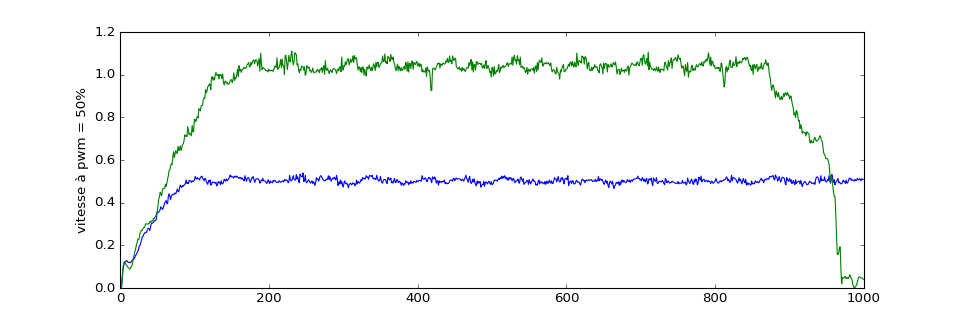

In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))
plt.plot(s1['50']['v'])
plt.ylabel('vitesse à pwm = 50%')
plt.show()

In [15]:
plt.plot(s1['100']['v'])